# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
!pip install citipy

     |████████████████████████████████| 557 kB 2.2 MB/s eta 0:00:01
  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559701 sha256=737a4d9e26a431806c8da1d22db2f580aa046586ad62c433f7dfb1c23893f8c9
  Stored in directory: /Users/justine.skyler/Library/Caches/pip/wheels/6d/df/5e/ad8eb9cc5ee7f4ba76865167c09f9a7edff405c669111d8353
Successfully built citipy


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

record = 0
set = 1

city_name = []
lat = []
long = []
max_temp = []
humidity = []
clouds = []
wind_speed = []
country = []
date = []


print("Beginning Data Retrieval")
print("-----------------------------")
for city in cities:
    
    #print(f"{query_url}+{city}")
    
    if record == 50:
        record = 0
        set += 1
    record += 1
    try:
        weather_response = requests.get(query_url+city).json()
        city_name.append(weather_response["name"])
        lat.append(weather_response["coord"]["lat"])
        long.append(weather_response["coord"]["lon"])
        max_temp.append(weather_response["main"]["temp_max"])
        humidity.append(weather_response["main"]["humidity"])
        clouds.append(weather_response["clouds"]["all"])
        wind_speed.append(weather_response["wind"]["speed"])
        country.append(weather_response["sys"]["country"])
        date.append(weather_response["dt"])
        
        print(f"Processing Record {record} of Set {set} | {city}")
        
        
    except:
        print("City not found. Skipping...")
        continue
    
    

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | vardo
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | krasnyy chikoy
City not found. Skipping...
Processing Record 5 of Set 1 | avarua
Processing Record 6 of Set 1 | guerrero negro
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | hithadhoo
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | hilo
Processing Record 12 of Set 1 | vaini
City not found. Skipping...
Processing Record 14 of Set 1 | beira
Processing Record 15 of Set 1 | mayo
Processing Record 16 of Set 1 | pevek
City not found. Skipping...
Processing Record 18 of Set 1 | belle glade
Processing Record 19 of Set 1 | khatanga
City not found. Skipping...
Processing Record 21 of Set 1 | butaritari
Processing Record 22 of Set 1 | gibsons
Processing Record 23 of Set 1 | akyab
Processing Record 24 of Set 1 | magangue
Processing Record 25 of Set

Processing Record 5 of Set 5 | da nang
Processing Record 6 of Set 5 | baker city
Processing Record 7 of Set 5 | blagoyevo
Processing Record 8 of Set 5 | uchana
Processing Record 9 of Set 5 | murray bridge
Processing Record 10 of Set 5 | tilichiki
Processing Record 11 of Set 5 | hovd
City not found. Skipping...
Processing Record 13 of Set 5 | tigil
City not found. Skipping...
Processing Record 15 of Set 5 | abu samrah
Processing Record 16 of Set 5 | bikin
Processing Record 17 of Set 5 | sitka
Processing Record 18 of Set 5 | souillac
Processing Record 19 of Set 5 | hobart
Processing Record 20 of Set 5 | mehamn
Processing Record 21 of Set 5 | kruisfontein
Processing Record 22 of Set 5 | christchurch
Processing Record 23 of Set 5 | wajima
Processing Record 24 of Set 5 | boksitogorsk
Processing Record 25 of Set 5 | asgabat
Processing Record 26 of Set 5 | mecca
Processing Record 27 of Set 5 | ribeira grande
Processing Record 28 of Set 5 | iwanai
Processing Record 29 of Set 5 | bilma
Processi

Processing Record 11 of Set 9 | okha
City not found. Skipping...
Processing Record 13 of Set 9 | qurayyat
Processing Record 14 of Set 9 | codrington
Processing Record 15 of Set 9 | alghero
Processing Record 16 of Set 9 | bourail
Processing Record 17 of Set 9 | masuda
Processing Record 18 of Set 9 | carballo
Processing Record 19 of Set 9 | lovozero
Processing Record 20 of Set 9 | mandalgovi
Processing Record 21 of Set 9 | georgetown
Processing Record 22 of Set 9 | honningsvag
Processing Record 23 of Set 9 | granada
Processing Record 24 of Set 9 | wanxian
Processing Record 25 of Set 9 | veraval
Processing Record 26 of Set 9 | cartagena del chaira
Processing Record 27 of Set 9 | mwinilunga
Processing Record 28 of Set 9 | dubovyy umet
Processing Record 29 of Set 9 | nampula
Processing Record 30 of Set 9 | alvorada
Processing Record 31 of Set 9 | meulaboh
Processing Record 32 of Set 9 | lugo
Processing Record 33 of Set 9 | vila
Processing Record 34 of Set 9 | shimoda
Processing Record 35 of

Processing Record 9 of Set 13 | pisco
Processing Record 10 of Set 13 | hojai
City not found. Skipping...
Processing Record 12 of Set 13 | zhezkazgan
Processing Record 13 of Set 13 | tarko-sale
Processing Record 14 of Set 13 | inirida
Processing Record 15 of Set 13 | smithers
Processing Record 16 of Set 13 | saint george
Processing Record 17 of Set 13 | port keats
Processing Record 18 of Set 13 | shitanjing
Processing Record 19 of Set 13 | hirara
Processing Record 20 of Set 13 | carbonia
Processing Record 21 of Set 13 | liepaja
Processing Record 22 of Set 13 | pascagoula
City not found. Skipping...
City not found. Skipping...
Processing Record 25 of Set 13 | bowen


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
wx_dict = {'City':city_name,
          'Lat':lat,
          'Lng':long,
          'Max Temp':max_temp,
          'Humidity':humidity,
          'Cloudiness':clouds,
          'Wind Speed':wind_speed,
          'Country':country,
          'Date':date}

wx_summary = pd.DataFrame(wx_dict)

wx_summary.to_csv(output_data_file)

wx_summary

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vardø,70.37,31.11,2.43,85,21,11.64,NO,1605314141
1,Albany,42.60,-73.97,6.11,85,48,1.58,US,1605314115
2,Krasnyy Chikoy,50.36,108.75,-3.00,95,100,0.95,RU,1605314141
3,Avarua,-21.21,-159.78,27.00,69,94,2.60,CK,1605313867
4,Guerrero Negro,27.98,-114.06,18.01,72,0,6.25,MX,1605314142
...,...,...,...,...,...,...,...,...,...
565,Hirara,24.80,125.28,24.00,57,75,6.70,JP,1605314250
566,Carbonia,39.17,8.52,13.33,87,20,1.00,IT,1605314251
567,Liepāja,56.54,21.04,5.00,86,100,3.10,LV,1605314251
568,Pascagoula,30.37,-88.56,17.22,88,1,2.27,US,1605314251


In [5]:
wx_analysis = pd.DataFrame(wx_summary.describe())
wx_analysis

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,570.00000,570.000000,570.000000,570.000000,570.000000,570.000000,5.700000e+02
mean,20.51714,18.359018,13.334123,74.845614,49.638596,3.271386,1.605314e+09
std,33.00125,90.518958,13.844968,18.448066,40.654434,2.281689,9.178005e+01
min,-54.80000,-179.170000,-30.000000,13.000000,0.000000,0.040000,1.605314e+09
25%,-6.96500,-63.687500,3.732500,65.000000,2.000000,1.500000,1.605314e+09
50%,25.50500,24.655000,17.530000,78.000000,46.000000,2.710000,1.605314e+09
75%,47.40750,95.912500,24.455000,89.000000,93.000000,4.600000,1.605314e+09
max,78.22000,179.320000,35.000000,100.000000,100.000000,15.190000,1.605314e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

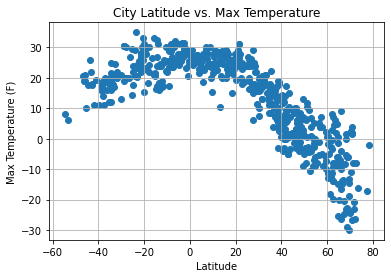

In [11]:
plt.scatter(wx_summary["Lat"],wx_summary["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature")
plt.grid(True)
plt.show()

## Latitude vs. Humidity Plot

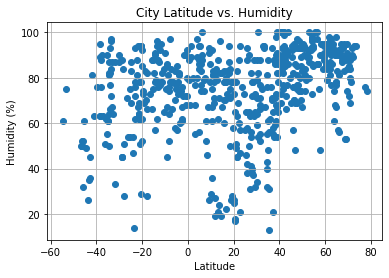

In [7]:
plt.scatter(wx_summary["Lat"],wx_summary["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity")
plt.grid(True)
plt.show()

## Latitude vs. Cloudiness Plot

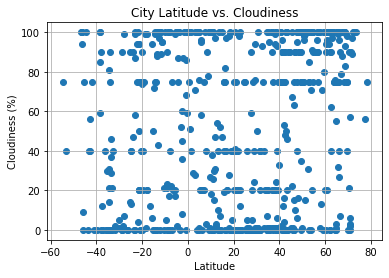

In [9]:
plt.scatter(wx_summary["Lat"],wx_summary["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness")
plt.grid(True)
plt.show()

## Latitude vs. Wind Speed Plot

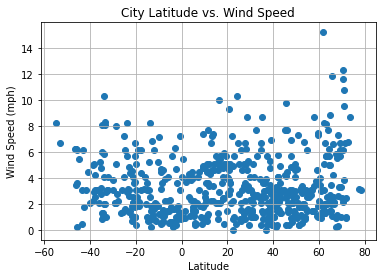

In [10]:
plt.scatter(wx_summary["Lat"],wx_summary["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed")
plt.grid(True)
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

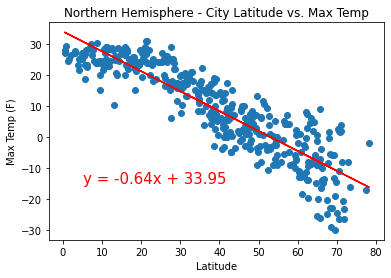

The r-value is: 0.8001910385090165


In [12]:
northern_hem = wx_summary.loc[wx_summary["Lat"] > 0]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(northern_hem["Lat"],northern_hem["Max Temp"])
regress_values = northern_hem["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_hem["Lat"],northern_hem["Max Temp"])
plt.plot(northern_hem["Lat"],regress_values,"r-")
plt.annotate(line_eq,(5,-15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title("Northern Hemisphere - City Latitude vs. Max Temp")

plt.savefig("output_data/Northern Hemisphere - Max Temp vs. Latitude.png")

plt.show()

print(f"The r-value is: {rvalue**2}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

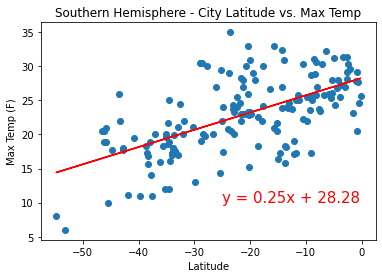

The r-value is: 0.375842584363708


In [13]:
southern_hem = wx_summary.loc[wx_summary["Lat"] < 0]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(southern_hem["Lat"],southern_hem["Max Temp"])
regress_values = southern_hem["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_hem["Lat"],southern_hem["Max Temp"])
plt.plot(southern_hem["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title("Southern Hemisphere - City Latitude vs. Max Temp")

plt.savefig("output_data/Southern Hemisphere - Max Temp vs. Latitude.png")

plt.show()

print(f"The r-value is: {rvalue**2}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

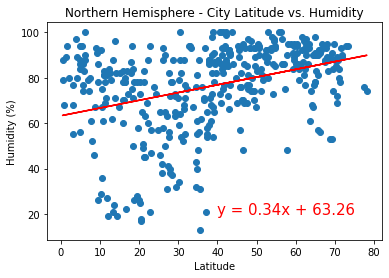

The r-value is: 0.12990258748614167


In [14]:
northern_hem = wx_summary.loc[wx_summary["Lat"] > 0]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(northern_hem["Lat"],northern_hem["Humidity"])
regress_values = northern_hem["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_hem["Lat"],northern_hem["Humidity"])
plt.plot(northern_hem["Lat"],regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere - City Latitude vs. Humidity")

plt.savefig("output_data/Northern Hemisphere - Humidity (%) vs. Latitude.png")

plt.show()

print(f"The r-value is: {rvalue**2}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

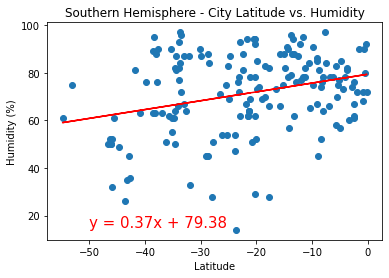

The r-value is: 0.08506276204249616


In [15]:
southern_hem = wx_summary.loc[wx_summary["Lat"] < 0]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(southern_hem["Lat"],southern_hem["Humidity"])
regress_values = southern_hem["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_hem["Lat"],southern_hem["Humidity"])
plt.plot(southern_hem["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-50,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere - City Latitude vs. Humidity")

plt.savefig("output_data/Southern Hemisphere - Humidity (%) vs. Latitude.png")

plt.show()

print(f"The r-value is: {rvalue**2}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

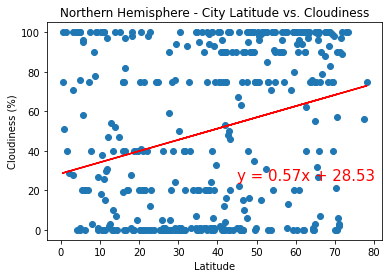

The r-value is: 0.07697752097088137


In [16]:
northern_hem = wx_summary.loc[wx_summary["Lat"] > 0]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(northern_hem["Lat"],northern_hem["Cloudiness"])
regress_values = northern_hem["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_hem["Lat"],northern_hem["Cloudiness"])
plt.plot(northern_hem["Lat"],regress_values,"r-")
plt.annotate(line_eq,(45,25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - City Latitude vs. Cloudiness")

plt.savefig("output_data/Northern Hemisphere - Cloudiness (%) vs. Latitude.png")

plt.show()

print(f"The r-value is: {rvalue**2}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

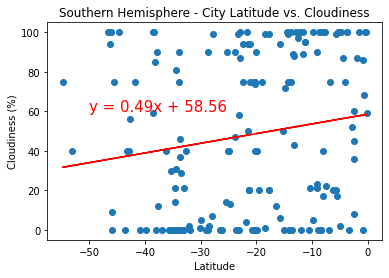

The r-value is: 0.026676816386111378


In [17]:
southern_hem = wx_summary.loc[wx_summary["Lat"] < 0]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(southern_hem["Lat"],southern_hem["Cloudiness"])
regress_values = southern_hem["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_hem["Lat"],southern_hem["Cloudiness"])
plt.plot(southern_hem["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - City Latitude vs. Cloudiness")

plt.savefig("output_data/Southern Hemisphere - Cloudiness (%) vs. Latitude.png")

plt.show()

print(f"The r-value is: {rvalue**2}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

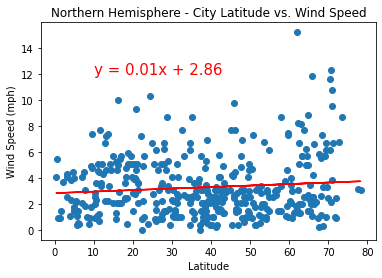

The r-value is: 0.009880394539431481


In [19]:
northern_hem = wx_summary.loc[wx_summary["Lat"] > 0]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(northern_hem["Lat"],northern_hem["Wind Speed"])
regress_values = northern_hem["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_hem["Lat"],northern_hem["Wind Speed"])
plt.plot(northern_hem["Lat"],regress_values,"r-")
plt.annotate(line_eq,(10,12),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere - City Latitude vs. Wind Speed")

plt.savefig("output_data/Northern Hemisphere - Wind Speed (mph) vs. Latitude.png")

plt.show()

print(f"The r-value is: {rvalue**2}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

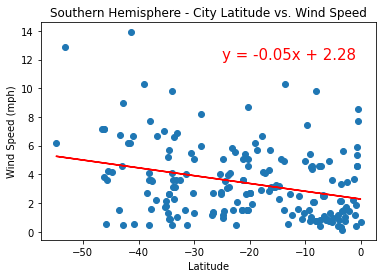

The r-value is: 0.09141526385506073


In [131]:
southern_hem = wx_summary.loc[wx_summary["Lat"] < 0]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(southern_hem["Lat"],southern_hem["Wind Speed"])
regress_values = southern_hem["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_hem["Lat"],southern_hem["Wind Speed"])
plt.plot(southern_hem["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-25,12),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere - City Latitude vs. Wind Speed")

plt.savefig("output_data/Southern Hemisphere - Wind Speed (mph) vs. Latitude.png")

plt.show()

print(f"The r-value is: {rvalue**2}")